In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp
import time
import random
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy import stats
from scipy import integrate
from celluloid import Camera
from bayes_opt import BayesianOptimization
import json
import seaborn as sns
import White_class
from scipy import special
import pymongo

In [4]:
connection = pymongo.MongoClient('localhost',27017)

db = connection.db
    
db_expected = db.Expected_model

max_parameters = db_expected.find({'target' : {"$gte" : 0.06665}},projection={"_id" : False,"datetime" : False})

# db_slowing = db.Slowing_beta

# max_parameters = db_slowing.distinct(key = 'params',filter = {'target' : {'$gte' : 23}})

for i in max_parameters:
    print(i)
    print(type(i))
    

{'target': 0.0666753843838724, 'params': {'beta_1': 0.6461462109437031, 'beta_2': 3.563920913781865, 'det_1': 117.99223775601251, 'det_2': 5.669679716550722, 'laseroff': 504757.18005055864, 'laseron': 264356.89973333676, 'main_det': 19.74010227764638}}
<class 'dict'>
{'target': 0.06665114149838881, 'params': {'beta_1': 0.16225855071834117, 'beta_2': 0.03040958868999022, 'det_1': 78.04069178017815, 'det_2': 10.631241211980964, 'laseroff': 538679.7778558542, 'laseron': 274111.0279933765, 'main_det': 18.804824545658214}}
<class 'dict'>
{'target': 0.06665084655271099, 'params': {'beta_1': 0.16225855071834117, 'beta_2': 0.09122876606997066, 'det_1': 78.04069178017815, 'det_2': 10.631241211980964, 'laseroff': 538679.7778558542, 'laseron': 274111.0279933765, 'main_det': 18.804824545658214}}
<class 'dict'>


In [15]:
main_detune = 17.81
sideband_detune = 162.9
white_detune = 15.38
beta_1 = 4.91
beta_2 = 2.971
laseron = 140800
laseroff = 421300
maxim = {'target': 0.2944409759829353,
 'params': {'beta_1': 3.8050995873529567,
  'beta_2': 9.936559576119455,
  'det_1': 87.59839010311943,
  'det_2': 25.530476380724924,
  'laseroff': 491912.16996315226,
  'laseron': 162300.30234814572,
  'main_det': 19.47056298409516}}
# max_parameters = db_expected.find({'target' : {"$gte" : 0.06665}},projection={"_id" : False, "target" : False,"datetime" : False})
# test = White_class.Whitelight(main_detune,sideband_detune,white_detune,beta_1,beta_2,laseron,laseroff)
test = White_class.Whitelight(**maxim['params'])
# test2 = White_class.Whitelight(**(max_parameters[1]["params"]))

In [16]:
test.motion_trace()
# test2.motion_trace()

Completed in 10.86 s.                                               
Completed in 11.25 s.                                               
Completed in 11.30 s.                                               
Completed in 10.98 s.                                               
Completed in 11.45 s.                                               
Completed in 12.33 s.                                               
Completed in 13.21 s.                                              
Completed in 12.42 s.                                               
Completed in 11.45 s.                                               
Completed in 14.30 s.                                              
Completed in 14.60 s.                                              
Completed in 15.36 s.                                              
Completed in 13.65 s.                                              
Completed in 13.02 s.                                              
Completed in 11.08 s.                   

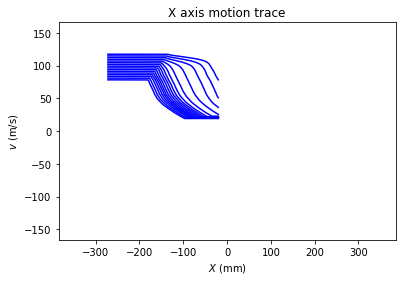

In [17]:
test.plot(save=0)

In [18]:
test.percentage()

0.2823841828717133

In [14]:
np.array(test.v_trap_initial)

array([14.        , 14.46666667, 14.93333333, 15.4       , 15.86666667,
       16.33333333, 16.8       , 17.26666667, 17.73333333, 18.2       ,
       18.66666667, 19.13333333])

In [10]:
test2 = White_class.Whitelight(**(max_parameters[1]["params"]))
test2.motion_trace()

Completed in 50.71 s.                                               
Completed in 1:03.                                                 
Completed in 59.92 s.                                               
Completed in 1:06.                                                 
Completed in 53.17 s.                                               
Completed in 56.05 s.                                               
Completed in 51.09 s.                                               
Completed in 49.85 s.                                              
Completed in 1:03.                                                  
Completed in 1:30.                                                 
Completed in 1:22.                                                 
Completed in 1:13.                                                 
Completed in 1:30.                                                 
Completed in 1:36.                                                  
Completed in 1:42.                       

In [11]:
test2.percentage()

0.0661678730192505

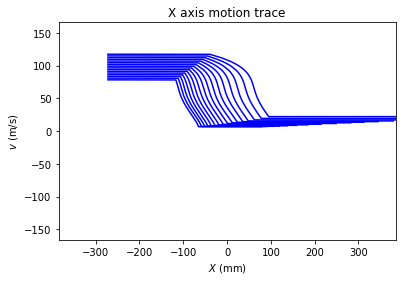

In [12]:
test2.plot(save=False,save_name="./Pictures/main_det=19.7.png")